## Supervised Learning
## Project: Finding Donors for *CharityML*

In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display         # Allows the use of display() for DataFrames
# from time import time

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
data[data['income'] == ">50K"].shape[0]

11208

In [3]:
# TODO: Total number of records
n_records = data.shape[0]
# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data['income'] == ">50K"].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['income'] == "<=50K"].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))

print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# First Stage: Data Cleaning

## Step 1: Handling Nulls

In [4]:
null_columns = data.isnull().sum().sort_values(ascending=False)
null_columns[null_columns != 0]

Series([], dtype: int64)

## Step 2: Handling Duplicated Data

In [5]:
print("Number of dublicated rows: ", data.duplicated().sum())

Number of dublicated rows:  5982


## **Duplicated data here it is not a sure thing to belong to the same person, maybe it is for different persons. So, we will not remove it**

In [6]:
# data = data.drop_duplicates()
# data.shape

# Second Stage: Data Analysis

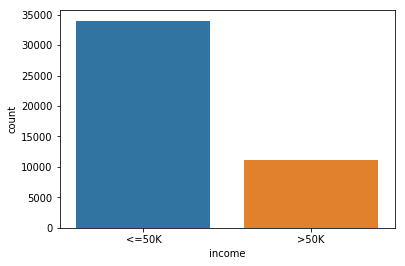

In [7]:
sb.countplot(data=data, x='income');

This bar chart shows that around 75% people's annual salary is less than 50K dollars, which means that they can not donate to the charity

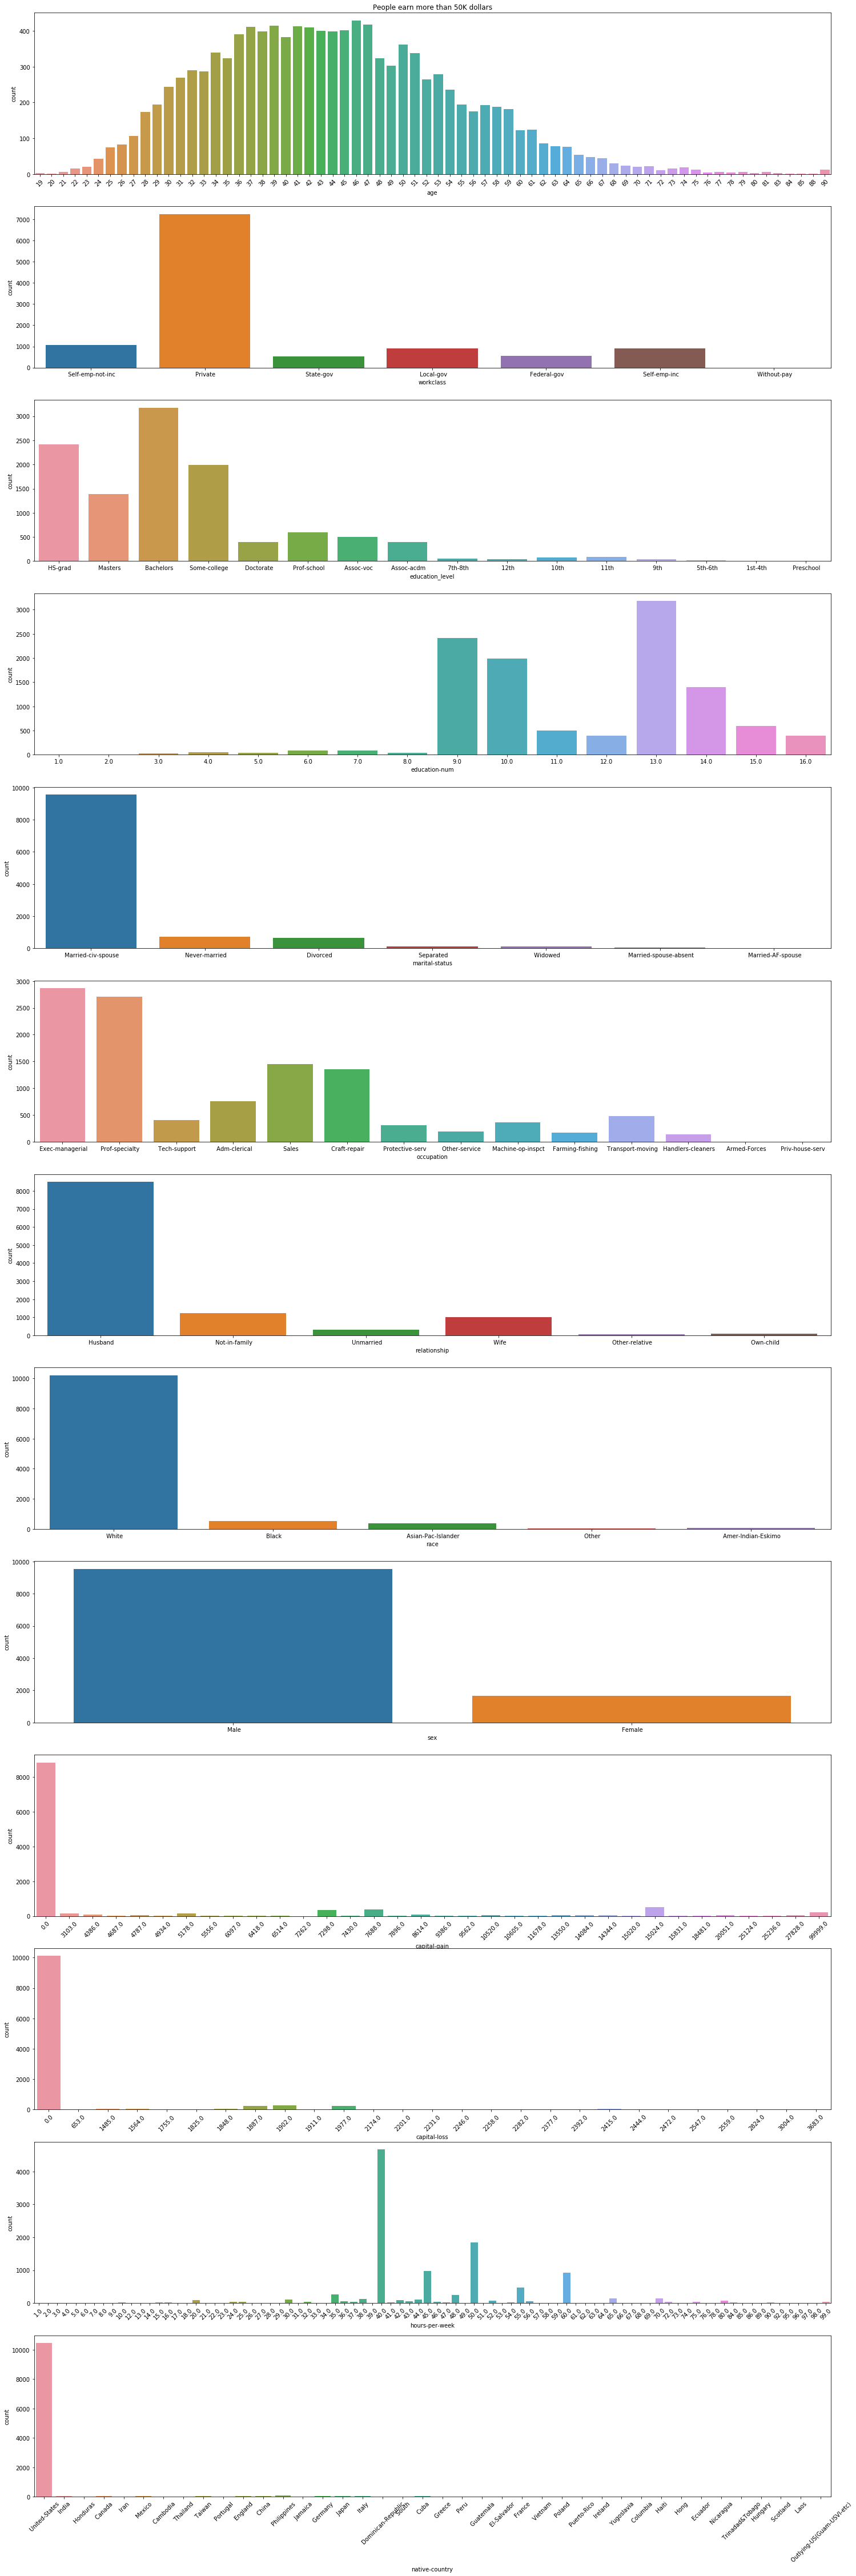

In [8]:
plt.figure(figsize=[25, 80])
for i in range(data.shape[1] - 1):
    plt.subplot(data.shape[1] - 1, 1, i+1)
    richPeople_data = data[data['income'] == ">50K"].copy()
    sb.countplot(data=richPeople_data, x=data.columns[i])
    plt.xlabel(f"{data.columns[i]}"); plt.ylabel("count")
    if(i == 0):
        plt.title("People earn more than 50K dollars")
    if(data[data.columns[i]].value_counts().count() > 16):
        plt.xticks(rotation=45)

### These graphs show that
1- People who are older than 30 years old and younger than 50 years old are the most profitable for more than 50 thousand annually

2- People who have his private buisness are the most profitable for more than 50 thousand annually

3- People whose education level is 'Bachelors' are the most profitable for more than 50 thousand annually, followed by those with 'HS-grade', then those with 'Some-college'

4- People whose education num is '13' are the most profitable for more than 50 thousand annually, followed by those with '9', then those with '10'

5- People who is married are the most profitable for more than 50 thousand annually

6- People with occupation 'Exec-managerial' and 'Prof-Speciality' are the most profitable for more than 50 thousand annually

7- People with race 'white' are the most profitable for more than 50 thousand annually

8- Males are the most profitable for more than 50 thousand annually

9- People with 'capital-gain' 0 are the most profitable for more than 50 thousand annually

10- People with 'capital-loss' 0 are the most profitable for more than 50 thousand annually

11- People who work 40 hours per week are the most profitable for more than 50 thousand annually

12- People whose native-country is 'united-states' are the most profitable for more than 50 thousand annually

# Third Stage: Data Preprocessing

### First: convert the income column type from string to int boolean

In [9]:
data.loc[data['income'] == "<=50K", 'income'] = 0
data.loc[data['income'] == ">50K", 'income'] = 1
data.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,0
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,0
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,1
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,1
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,1


## Step 1: Processing Skewed Data

### Fisrt: Get numerical data only

In [10]:
# Get the numerical data only from data DataFrame
data_numerical = data.select_dtypes(include= ['float64', 'int64']).copy()
data_numerical.head(10)

,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,13.0,2174.0,0.0,40.0,0
1,50,13.0,0.0,0.0,13.0,0
2,38,9.0,0.0,0.0,40.0,0
3,53,7.0,0.0,0.0,40.0,0
4,28,13.0,0.0,0.0,40.0,0
5,37,14.0,0.0,0.0,40.0,0
6,49,5.0,0.0,0.0,16.0,0
7,52,9.0,0.0,0.0,45.0,1
8,31,14.0,14084.0,0.0,50.0,1
9,42,13.0,5178.0,0.0,40.0,1


c:\ProgramData\anaconda3\envs\Abdo_Halem\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


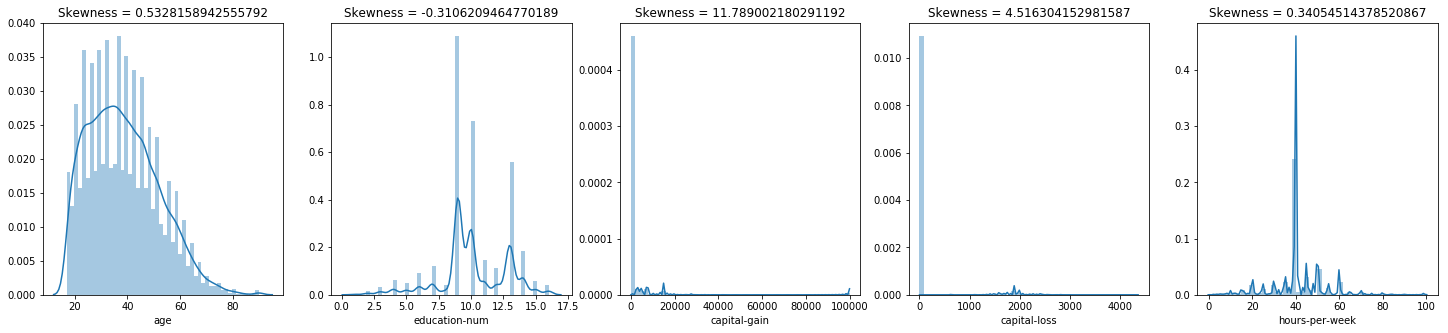

In [11]:
plt.figure(figsize=[25,5])
for i in range(0, 5):
    plt.subplot(1, 5, i+1)
    column = data[data_numerical.columns[i]]
    sb.distplot(column)
    plt.title(f"Skewness = {column.skew()}")

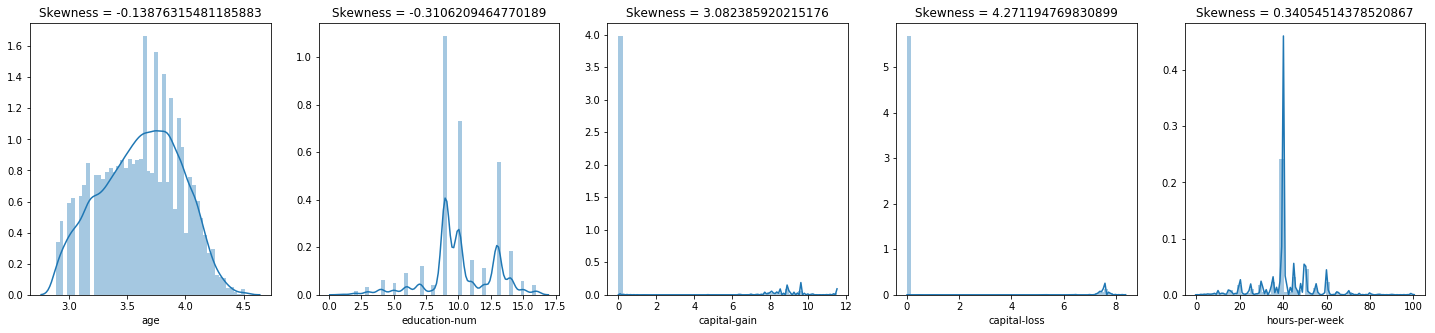

In [12]:
# Use log tranform to reduce the skewness of the data
plt.figure(figsize=[25,5])
for i in range(0, 5):
    plt.subplot(1, 5, i+1)
    column = data[data_numerical.columns[i]].copy()
    if(abs(column.skew()) > 0.5):
        column = np.log1p(data[data_numerical.columns[i]])               # Use log(x+1) to take log(x=0) without errors
        data.loc[ : , data_numerical.columns[i]] = column                # Update the DataFrame
        
    sb.distplot(column)
    plt.title(f"Skewness = {column.skew()}")


# Step 4: Normalization (Using MinMaxScaler for numerical data only)

In [13]:
# Normalize the numerical data only in the DataFrame
from sklearn.preprocessing import MinMaxScaler      #range from 0 to 1
normalizer = MinMaxScaler()
data_normalized = data.copy()
data_normalized[data_numerical.columns] = normalizer.fit_transform(data_normalized[data_numerical.columns])
data_normalized.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.492758,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States,0.0
1,0.642679,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,0.0
2,0.477134,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,0.0
3,0.677952,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,0.0
4,0.294309,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,0.0
5,0.461105,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.397959,United-States,0.0
6,0.630459,Private,9th,0.266667,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,0.153061,Jamaica,0.0
7,0.666417,Self-emp-not-inc,HS-grad,0.533333,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.448980,United-States,1.0
8,0.355056,Private,Masters,0.866667,Never-married,Prof-specialty,Not-in-family,White,Female,0.829751,0.0,0.500000,United-States,1.0
9,0.537387,Private,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.742849,0.0,0.397959,United-States,1.0


# Step 5: Get Correlation between every column and income column


In [14]:
data_numerical = data_normalized.select_dtypes(include= ['float64', 'int64']).copy()
data_numerical.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,0.492758,0.800000,0.667492,0.0,0.397959,0.0
1,0.642679,0.800000,0.000000,0.0,0.122449,0.0
2,0.477134,0.533333,0.000000,0.0,0.397959,0.0
3,0.677952,0.400000,0.000000,0.0,0.397959,0.0
4,0.294309,0.800000,0.000000,0.0,0.397959,0.0


c:\ProgramData\anaconda3\envs\Abdo_Halem\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


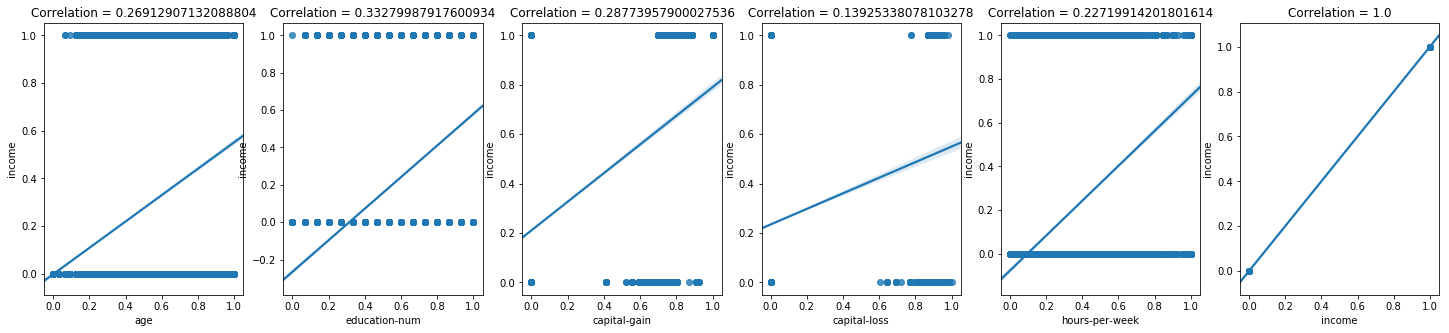

In [15]:
# Show correlation and outliers first by data visualization
plt.figure(figsize = [25, 5])
# Calculate the correlation for each column with "income" column
corr = data_normalized.corr()['income']
for i in range(0, len(data_numerical.columns)):     # range 0 to 6
    plt.subplot(1, 6, 1+i)
    sb.regplot(data = data_normalized[data_numerical.columns], x = data_numerical.columns[i], y = 'income');
    plt.xlabel(data_numerical.columns[i])
    plt.ylabel('income')
    plt.title(f"Correlation = {corr[i]}")

## **The correlation between numerical data and income is low** 

# Step 6: Convert Categorical Data into Numerical using One-Hot Encoding from sklearn Library

### Get Categorical Data First

In [16]:
catg_col = data_normalized.drop(data_numerical.columns, axis=1).columns
catg_col

Index(['workclass', 'education_level', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore') 
# Fit and transform the data
features_cat = encoder.fit_transform(data_normalized[catg_col])
features_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [18]:
encoder.get_feature_names(catg_col)

array(['workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'education_level_ 10th',
       'education_level_ 11th', 'education_level_ 12th',
       'education_level_ 1st-4th', 'education_level_ 5th-6th',
       'education_level_ 7th-8th', 'education_level_ 9th',
       'education_level_ Assoc-acdm', 'education_level_ Assoc-voc',
       'education_level_ Bachelors', 'education_level_ Doctorate',
       'education_level_ HS-grad', 'education_level_ Masters',
       'education_level_ Preschool', 'education_level_ Prof-school',
       'education_level_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ 

In [19]:
encoded_features_df = pd.DataFrame(features_cat, columns=encoder.get_feature_names(catg_col), index=data_normalized.index)
encoded_features_df.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
data_normalized[data_numerical.columns].head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,0.492758,0.800000,0.667492,0.0,0.397959,0.0
1,0.642679,0.800000,0.000000,0.0,0.122449,0.0
2,0.477134,0.533333,0.000000,0.0,0.397959,0.0
3,0.677952,0.400000,0.000000,0.0,0.397959,0.0
4,0.294309,0.800000,0.000000,0.0,0.397959,0.0


In [21]:
data_processed = pd.concat([data_normalized[data_numerical.columns], encoded_features_df], axis=1)
data_processed.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.492758,0.800000,0.667492,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.642679,0.800000,0.000000,0.0,0.122449,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.477134,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.677952,0.400000,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.294309,0.800000,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Third Stage: Model Selection
We will choose **"Support Vector Classifier"** model for its efficiency and speed.

In [22]:
from sklearn.model_selection import ShuffleSplit

## First: Data Clustering

### Split features and target data

In [49]:
income = data_processed["income"].copy()
features = data_processed.drop('income', axis=1)
features.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.492758,0.800000,0.667492,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.642679,0.800000,0.000000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.477134,0.533333,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.677952,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.294309,0.800000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


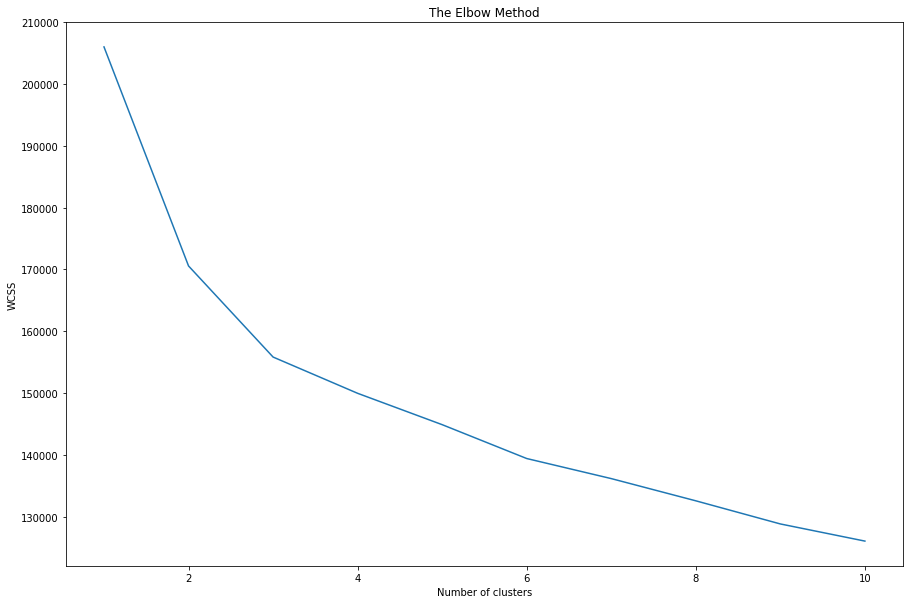

In [50]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):                  # try to test k=1 to 10
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    # kmeans.fit(data_processed)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)        # kmeans.inertia_   get the wcss
plt.figure(figsize=[15, 10])
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### So, the best number of clusters is 

In [51]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
# y_kmeans = kmeans.fit_predict(data_processed)
y_kmeans = kmeans.fit_predict(features)
print(len(y_kmeans))
print(y_kmeans)             # you have 3 clusters from 0 to 2
kmeans.cluster_centers_     # cluster cetroids

45222
[1 2 1 ... 4 6 2]


array([[ 4.80853544e-01,  6.30504416e-01,  9.22019259e-02,
         5.41751147e-02,  3.70517673e-01,  2.78401437e-02,
         1.02828918e-01,  7.03637180e-01,  2.96362820e-02,
         8.53165694e-02,  4.89447687e-02,  1.79613830e-03,
         1.84104176e-02,  1.70633139e-02,  7.63358779e-03,
         3.59227661e-03,  9.42972609e-03,  1.25729681e-02,
         1.48181410e-02,  4.62505613e-02,  5.07409070e-02,
         1.92635833e-01,  1.07768298e-02,  3.22406825e-01,
         7.58868433e-02,  8.98069151e-04,  1.66142793e-02,
         2.00269421e-01, -6.38378239e-16,  8.53165694e-03,
         9.91468343e-01, -1.37043155e-16, -1.22124533e-15,
         2.39391840e-16, -1.56125113e-16,  2.47867086e-01,
        -7.04731412e-19,  2.20026942e-02,  1.56264032e-01,
         8.98069151e-03,  1.30220027e-02,  5.70273911e-02,
         1.28423889e-01,  9.87876066e-03,  2.10148181e-01,
         5.38841491e-03,  9.51953300e-02,  3.45756623e-02,
         1.12258644e-02,  2.72004641e-15, -2.77555756e-1

In [52]:
cluster = pd.Series(data=y_kmeans)
cluster.index = features.index
cluster.isna().sum()

0

### Add cluster dataseries to our dataframe 'data'

In [53]:
features["Cluster"] = cluster
features.head()
# np.isnan(features['Cluster']).sum()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,Cluster
0,0.492758,0.800000,0.667492,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.642679,0.800000,0.000000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
2,0.477134,0.533333,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.677952,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
4,0.294309,0.800000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [54]:
from sklearn.metrics import f1_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric choosen.
    """
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = f1_score(y_true, y_predict)
    # Return the score
    return score

In [55]:
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets (training = 80%, testing = test_size = 20%)
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size=0.2, random_state=42)
print("Training and testing split was successful.")

Training and testing split was successful.


In [56]:
from sklearn.svm import SVC

In [57]:
model = SVC(C=2, kernel='poly', degree=4, random_state=42)
model.fit(X_train,y_train)

SVC(C=2, degree=4, kernel='poly', random_state=42)

In [58]:
# Making predictions
train_pred2 = model.predict(X_train)
test_pred2 = model.predict(X_test) 

In [59]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, train_pred2)
test_accuracy = accuracy_score(y_test, test_pred2)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)
print('The training F1 Score is', f1_score(y_train, train_pred2))
print('The testing F1 Score is', f1_score(y_test, test_pred2))

The training accuracy is 0.8425518976145064
The test accuracy is 0.8372581536760642
The training F1 Score is 0.6345438213781599
The testing F1 Score is 0.627906976744186


# Try Single Prediction Option 1

In [60]:
original_data = features.loc[[7], :]
original_data

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,Cluster
7,0.666417,0.533333,0.0,0.0,0.44898,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3


In [61]:
output = model.predict(features.loc[[8],:])
output

array([1.])

In [62]:
income.shape

(45222,)

In [63]:
features.shape

(45222, 104)

In [72]:
def predection_fun(row, model, encoder, normalizer):
    # Add predicted row to the original dataframe
    original_data = pd.read_csv("census.csv")
    original_data = original_data.append(row, ignore_index=True)
    # First fill nan value in 'income' column of the last row
    original_data['income'] = original_data['income'].fillna("<=50K").astype(str)
    # Convert income to numerical values
    original_data.loc[original_data ['income'] == "<=50K", 'income'] = 0
    original_data.loc[original_data ['income'] == ">50K", 'income'] = 1
    
    # Get the mean of numerical columns
    numerical_cols = original_data.select_dtypes(include= ['float64', 'int64']).copy()
    mean_col = original_data[numerical_cols.columns].mean()
    null_columns = original_data[numerical_cols.columns]
    null_columns = null_columns.columns[null_columns.isnull().sum() > 0]
    # Fill nan values with the mean of its column
    original_data[null_columns] = original_data[null_columns].fillna(mean_col[null_columns])
    # Drop nan values in categorical data
    original_data = original_data.dropna(subset = catg_col)

    # Apply log transform for skewed data as preprocessing
    skewed_cols = abs(numerical_cols.skew() > 0.5)
    skewed_cols = skewed_cols[skewed_cols == True].index
    original_data[skewed_cols] = np.log1p(original_data[skewed_cols])

    # Normalize the numerical data
    numerical_cols = original_data.select_dtypes(include= ['float64', 'int64']).copy()
    original_data[numerical_cols.columns] = normalizer.transform(numerical_cols)

    # Convert categorical data to numerical
    categorical_cols = original_data.drop(numerical_cols.columns, axis=1).columns
    feature_coded = encoder.transform(original_data[categorical_cols])
    encoded_df = pd.DataFrame(feature_coded, columns=encoder.get_feature_names(categorical_cols), index=original_data.index)
    original_data = pd.concat([original_data[numerical_cols.columns], encoded_df], axis=1)

    # Data Clustering: First remove 'income' column
    if 'income' in original_data.columns:
        original_data.drop('income', axis=1, inplace=True)

    # Check for NaNs again before clustering
    if original_data.isnull().values.any():
        raise ValueError("Data still contains NaN values")
    
    kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(original_data)
    cluster = pd.Series(data=y_kmeans)
    cluster.index = original_data.index
    original_data["Cluster"] = cluster
    row_processed = original_data.iloc[original_data.shape[0]-1, :].to_frame().T    # Convert Series to DataFrame
    output = model.predict(row_processed)
    return output

In [73]:
original_data = pd.read_csv("census.csv")
input_row = original_data.loc[[9], :]
print(input_row)
input_row = original_data.loc[[9], :].drop('income', axis=1)
input_row

   age workclass education_level  education-num       marital-status  \
9   42   Private       Bachelors           13.0   Married-civ-spouse   

         occupation relationship    race    sex  capital-gain  capital-loss  \
9   Exec-managerial      Husband   White   Male        5178.0           0.0   

   hours-per-week  native-country income  
9            40.0   United-States   >50K  


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States


In [74]:
output = predection_fun(input_row, model, encoder=encoder, normalizer=normalizer)
output

array([0.])

In [75]:
if(output == 1):
    print("This person's salary is expected to be higher than 50k$")
else:
    print("This person's salary is expected to be less than 50k$")

This person's salary is expected to be less than 50k$


In [42]:
# import joblib
# joblib.dump(predection_fun, 'my_prediction_fun.pkl')

['my_prediction_fun.pkl']

In [70]:
import joblib
# joblib.dump(model, 'charity_model.pkl')
joblib.dump(encoder, 'encoder.pkl')
joblib.dump(normalizer, 'normalizer.pkl')

['normalizer.pkl']